In [798]:
import numpy as np
import pandas as pd

In [799]:
match = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [800]:
match.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [801]:
match.shape

(1095, 20)

In [802]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [803]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()
total_score_df

,match_id,inning,total_runs
0,335982,1,222
1,335982,2,82
2,335983,1,240
3,335983,2,207
4,335984,1,129
...,...,...,...
2212,1426310,2,174
2213,1426311,1,175
2214,1426311,2,139
2215,1426312,1,113


In [804]:
total_score_df = total_score_df[total_score_df['inning']== 1]
total_score_df 

,match_id,inning,total_runs
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110
...,...,...,...
2207,1426307,1,214
2209,1426309,1,159
2211,1426310,1,172
2213,1426311,1,175


In [805]:
match_df = match.merge(total_score_df[['match_id','total_runs']], left_on='id', right_on='match_id')

In [806]:
match_df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,222
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,...,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426307,214
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit,1426309,159
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,...,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar,1426310,172
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,...,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426311,175


In [807]:
match_df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [808]:
ipl_teams = [
    "Chennai Super Kings",
    "Delhi Capitals",
    "Gujarat Titans",
    "Kolkata Knight Riders",
    "Lucknow Super Giants",
    "Mumbai Indians",
    "Punjab Kings",
    "Rajasthan Royals",
    "Royal Challengers Bengaluru",
    "Sunrisers Hyderabad"
]

In [809]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Decan Chargers', 'Sunrisers Hyderabas')
match_df['team2'] = match_df['team2'].str.replace('Decan Chargers', 'Sunrisers Hyderabas')

match_df['team1'] = match_df['team1'].str.replace('Royal Challengers Bangalore', 'Royal Challengers Bengaluru')
match_df['team2'] = match_df['team2'].str.replace('Royal Challengers Bangalore', 'Royal Challengers Bengaluru')

match_df['team1'] = match_df['team1'].str.replace('Kings XI Punjab', 'Punjab Kings')
match_df['team2'] = match_df['team2'].str.replace('Kings XI Punjab', 'Punjab Kings')

match_df['team1'] = match_df['team1'].str.replace('Gujarat Lions', 'Gujarat Titans')
match_df['team2'] = match_df['team2'].str.replace('Gujarat Lions', 'Gujarat Titans')

In [810]:
match_df = match_df[match_df['team1'].isin(ipl_teams)]
match_df = match_df[match_df['team2'].isin(ipl_teams)]

In [811]:
match_df.shape

(936, 22)

In [812]:
match_df['method'].unique()

array([nan, 'D/L'], dtype=object)

In [813]:
match_df = match_df[match_df['method'].isna()]

In [814]:
match_df = match_df[['match_id','city','winner','total_runs']]

In [815]:
delivery_df = match_df.merge(delivery, on='match_id')

In [816]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [817]:
delivery_df.shape

(106427, 20)

In [818]:
delivery_df['current_score']=delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [819]:
delivery_df['runs_left']=delivery_df['total_runs_x']-delivery_df['current_score']

In [820]:
delivery_df['balls_left']= 120 - (delivery_df['over']*6 + delivery_df['ball'])

In [821]:
delivery_df['player_dismissed']=delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x =='0' else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values
delivery_df['wickets'] = 10-wickets
delivery_df.tail()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
220249,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,1,NaN,0,0,NaN,NaN,110,3,61,8
220250,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,1,NaN,0,0,NaN,NaN,111,2,60,8
220251,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,1,NaN,0,0,NaN,NaN,112,1,59,8
220252,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,1,NaN,0,0,NaN,NaN,113,0,58,8
220253,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,3,VR Iyer,...,1,NaN,0,0,NaN,NaN,114,-1,57,8


In [822]:
#crr = runs/overs
delivery_df['crr']= (delivery_df['current_score']*6)/(120-delivery_df['balls_left'])
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,NaN,0,0,NaN,NaN,1,221,119,10,6.0
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,wides,0,0,NaN,NaN,2,220,118,10,6.0
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,NaN,0,0,NaN,NaN,2,220,117,10,4.0
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,NaN,0,0,NaN,NaN,3,219,116,10,4.5
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,NaN,0,0,NaN,NaN,4,218,115,10,4.8


In [823]:
delivery_df['rrr']= (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [824]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [825]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [826]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [827]:
final_df = final_df.sample(final_df.shape[0])

In [828]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
140036,Kolkata Knight Riders,Mumbai Indians,Abu Dhabi,113,43,6,195,6.38961,15.767442,0


In [829]:
final_df.dropna(inplace=True)

In [830]:
final_df = final_df[final_df['balls_left']!=0]

In [831]:
x = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [832]:
x_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
153068,Sunrisers Hyderabad,Delhi Capitals,Abu Dhabi,139,83,7,189,8.108108,10.048193
173129,Royal Challengers Bangalore,Chennai Super Kings,Mumbai,70,28,3,216,9.521739,15.000000
53354,Royal Challengers Bangalore,Rajasthan Royals,Bangalore,104,108,10,117,6.500000,5.777778
61008,Rajasthan Royals,Sunrisers Hyderabad,Hyderabad,120,102,10,136,5.333333,7.058824
114377,Sunrisers Hyderabad,Kings XI Punjab,Chandigarh,32,5,5,193,8.400000,38.400000
...,...,...,...,...,...,...,...,...,...
30152,Mumbai Indians,Delhi Daredevils,Delhi,44,54,8,95,4.636364,4.888889
96514,Mumbai Indians,Sunrisers Hyderabad,Visakhapatnam,140,80,5,177,5.550000,10.500000
125116,Mumbai Indians,Delhi Capitals,Mumbai,186,103,10,213,9.529412,10.834951
86029,Delhi Daredevils,Kolkata Knight Riders,Kolkata,21,2,4,171,7.627119,63.000000


In [833]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
trf = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(sparse_output=False, drop='first'),
        ['batting_team','bowling_team','city'])
    ],
    remainder='passthrough')

In [834]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [835]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [836]:
pipe.fit(x_train,y_train)

,steps,"[('step1', ...), ('step2', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('encoder', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [837]:
y_pred = pipe.predict(x_test)

In [838]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8103422433175118

In [839]:
pipe.predict_proba(x_test)[89]

array([0.19663129, 0.80336871])

In [840]:
def match_summary(row):
     print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))

In [844]:
def match_progression(x_df, match_id, pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(0,temp_df.shape[0])
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target

In [854]:
temp_df,target = match_progression(delivery_df,392185,pipe)
temp_df

Target- 179


,end_of_over,runs_after_over,wickets_in_over,lose,win
10464,0,5,1,60.3,39.7
10470,1,9,0,53.5,46.5
10476,2,10,0,45.8,54.2
10483,3,7,0,43.6,56.4
10490,4,8,0,39.7,60.3
10497,5,7,1,52.2,47.8
10503,6,2,1,71.3,28.7
10509,7,3,2,90.6,9.4
10515,8,2,0,92.4,7.6
10521,9,3,0,93.5,6.5


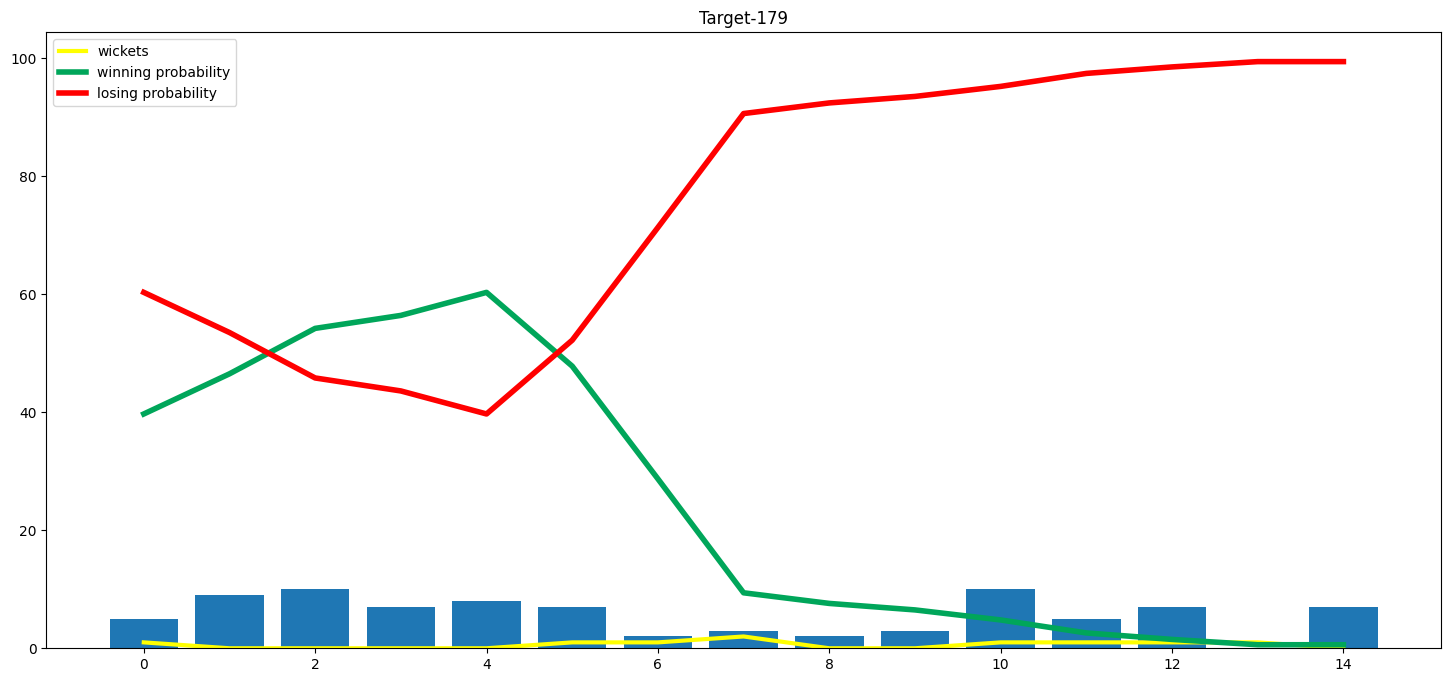

In [860]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3, label='wickets')
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4,label='winning probability')
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4,label='losing probability')
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))
plt.legend()
plt.show()

In [857]:
ipl_teams

['Chennai Super Kings',
 'Delhi Capitals',
 'Gujarat Titans',
 'Kolkata Knight Riders',
 'Lucknow Super Giants',
 'Mumbai Indians',
 'Punjab Kings',
 'Rajasthan Royals',
 'Royal Challengers Bengaluru',
 'Sunrisers Hyderabad']

In [858]:
delivery_df['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Jaipur', 'Chennai',
       'Kolkata', 'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Dharamsala', 'Pune', 'Hyderabad', 'Raipur', 'Ranchi',
       'Abu Dhabi', nan, 'Cuttack', 'Visakhapatnam', 'Rajkot', 'Kanpur',
       'Bengaluru', 'Indore', 'Dubai', 'Sharjah', 'Navi Mumbai',
       'Lucknow', 'Guwahati', 'Mohali'], dtype=object)

In [861]:
import pickle
pickle.dump(pipe,open('pikle.pkl', 'wb'))